In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# path
path_prefix = 'D:/USA 2020 summer/visual_internship/ANZ'

# 1.1 Load the transaction dataset

In [2]:
df = pd.read_csv(os.path.join(path_prefix, 'ANZ synthesised transaction dataset.csv'), parse_dates =["date", "extraction"])
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# 1.2 Data Preparation

In [3]:
# Examine the summary of the dataset
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [4]:
df.dtypes

status                            object
card_present_flag                float64
bpay_biller_code                  object
account                           object
currency                          object
long_lat                          object
txn_description                   object
merchant_id                       object
merchant_code                    float64
first_name                        object
balance                          float64
date                      datetime64[ns]
gender                            object
age                                int64
merchant_suburb                   object
merchant_state                    object
extraction           datetime64[ns, UTC]
amount                           float64
transaction_id                    object
country                           object
customer_id                       object
merchant_long_lat                 object
movement                          object
dtype: object

In [5]:
import numpy as np
object_feature = ['status', 'bpay_biller_code', 'account','currency', 'long_lat', 'txn_description', 
                  'merchant_id', 'first_name', 'gender','merchant_suburb', 'merchant_state', 
                  'transaction_id', 'country', 'customer_id', 'merchant_long_lat','movement']
for feature in object_feature:
    print(feature, len(df[feature].value_counts()))

status 2
bpay_biller_code 3
account 100
currency 1
long_lat 100
txn_description 6
merchant_id 5725
first_name 80
gender 2
merchant_suburb 1609
merchant_state 8
transaction_id 12043
country 1
customer_id 100
merchant_long_lat 2703
movement 2


In [6]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [7]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [8]:
#derive weekday and hour data of each transaction
df["monthly"] = [df.date[x].month for x in range(len(df.date))]
df["weekday"] = df["date"].dt.weekday
df["hour"] = [df.extraction[x].hour for x in range(len(df.extraction))]
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,monthly,weekday,hour
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,2,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,2,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8,2,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8,2,1
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8,2,1


In [9]:
# interaction account_customer_id
df["account_customer"] = df["account"] + "_" + df["customer_id"]
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,amount,transaction_id,country,customer_id,merchant_long_lat,movement,monthly,weekday,hour,account_customer
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,2,1,ACC-1598451071_CUS-2487424745
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,2,1,ACC-1598451071_CUS-2487424745
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8,2,1,ACC-1222300524_CUS-2142601169
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8,2,1,ACC-1037050564_CUS-1614226872
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8,2,1,ACC-1598451071_CUS-2487424745


In [10]:
# split customer & merchant lat_long into individual columns
df["clong"] = [df["long_lat"][x].split(" ")[0] for x in range(len(df.long_lat))]
df["clat"] = [df["long_lat"][x].split(" ")[1] for x in range(len(df.long_lat))]
df["clong"] = df["clong"].astype(float)
df["clat"] = df["clat"].astype(float)

In [11]:
df_m = df.loc[df["merchant_long_lat"].notnull()]
df_m["mlong"] = [df_m["merchant_long_lat"].iloc[x].split(" ")[0] for x in range(len(df_m.merchant_long_lat))]
df_m["mlat"] = [df_m["merchant_long_lat"].iloc[x].split(" ")[1] for x in range(len(df_m.merchant_long_lat))]
df_m["mlong"] = df_m["mlong"].astype(float)
df_m["mlat"] = df_m["mlat"].astype(float)
df = pd.concat([df,df_m["mlong"]], axis=1)
df = pd.concat([df,df_m["mlat"]], axis=1)
df.head()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_long_lat,movement,monthly,weekday,hour,account_customer,clong,clat,mlong,mlat
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,153.38 -27.99,debit,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,153.38,-27.99
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,151.21 -33.87,debit,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,151.21,-33.87
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,151.21 -33.87,debit,8,2,1,ACC-1222300524_CUS-2142601169,151.23,-33.94,151.21,-33.87
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,153.05 -26.68,debit,8,2,1,ACC-1037050564_CUS-1614226872,153.10,-27.66,153.05,-26.68
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,153.44 -28.06,debit,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,153.44,-28.06


In [12]:
# check the range of customer location
# filtering out transactions for those who don't reside in Australia
# Australia location (113~154, -10~-44)
df["In_Australia"] = [df["clong"][x]>113 and df["clong"][x]<154 and df["clat"][x]>(-44) and df["clat"][x]<(-10) for x in range(len(df.clong))]
df_inAustralia = df[df["In_Australia"] == True]
df_inAustralia.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,movement,monthly,weekday,hour,account_customer,clong,clat,mlong,mlat,In_Australia
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,debit,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,153.38,-27.99,True
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,debit,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,151.21,-33.87,True
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,debit,8,2,1,ACC-1222300524_CUS-2142601169,151.23,-33.94,151.21,-33.87,True
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,debit,8,2,1,ACC-1037050564_CUS-1614226872,153.10,-27.66,153.05,-26.68,True
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,debit,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,153.44,-28.06,True


# 1.3 Gather some interesting overall insights about the data.

(array([1.1176e+04, 4.7200e+02, 2.2100e+02, 7.6000e+01, 8.0000e+01,
        9.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00]),
 array([1.000000e-01, 8.836880e+02, 1.767276e+03, 2.650864e+03,
        3.534452e+03, 4.418040e+03, 5.301628e+03, 6.185216e+03,
        7.068804e+03, 7.952392e+03, 8.835980e+03]),
 <a list of 10 Patch objects>)

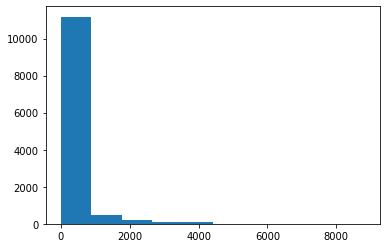

In [13]:
plt.hist(df.amount)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Overall Transaction Amount')

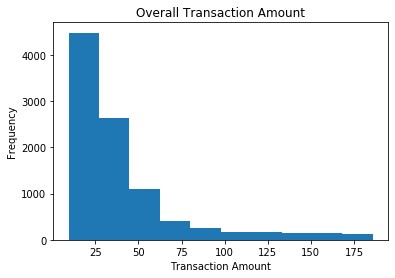

In [14]:
df.amount_adjusted = df.amount[df.amount.between(df.amount.quantile(.10), df.amount.quantile(.90))] 
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.hist(df.amount_adjusted)
plt.title("Overall Transaction Amount")

(array([7.68e+03, 2.50e+01, 6.00e+00, 1.00e+00, 1.00e+00, 3.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([1.000000e-01, 7.081990e+02, 1.416298e+03, 2.124397e+03,
        2.832496e+03, 3.540595e+03, 4.248694e+03, 4.956793e+03,
        5.664892e+03, 6.372991e+03, 7.081090e+03]),
 <a list of 10 Patch objects>)

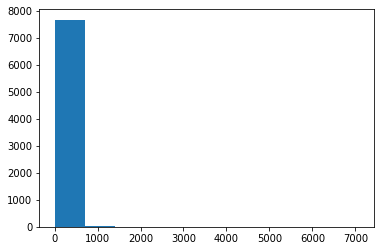

In [15]:
df_purchase = df[df["txn_description"]==('POS' or "SALES-POS")]
plt.hist(df_m.amount)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Purchase Transaction Amount')

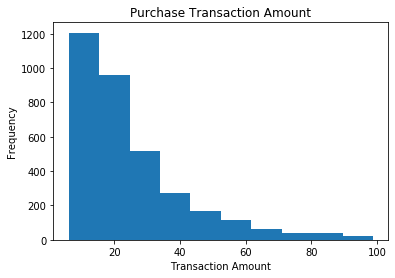

In [16]:
df_purchase.amount_adjusted = df_purchase.amount[df_purchase.amount.between(df_purchase.amount.quantile(.05), df_purchase.amount.quantile(.95))] 
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.hist(df_purchase.amount_adjusted)
plt.title("Purchase Transaction Amount")

Text(0.5, 1.0, "Customers' Monthly Transaction Volume")

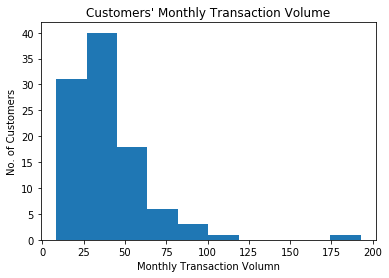

In [17]:
df_customer = df.pivot_table(values="transaction_id", index="customer_id", columns="monthly", aggfunc =len)
df_customer = df_customer.reset_index()
df_customer["avg_volumn"] = [sum(df_customer.loc[x, [8,9,10]])/3 for x in range(len(df_customer))]

plt.xlabel('Monthly Transaction Volumn')
plt.ylabel('No. of Customers')
plt.hist(df_customer.avg_volumn)
plt.title("Customers' Monthly Transaction Volume")

# 1.4 Segment the dataset by transaction date and time

Text(0.5, 1.0, 'Average Transaction Volume by Weekday')

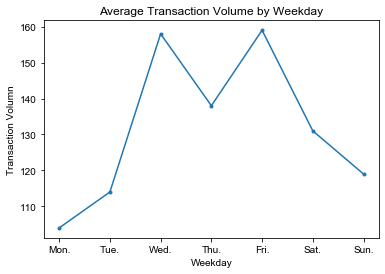

In [18]:
df_weekday = df.pivot_table(values="transaction_id", index="weekday", aggfunc =len)

import datetime
start = datetime.date(2018,8,1)
end = datetime.date(2018,10,31)
num_days = (end -start).days +1
num_weeks =(num_days)//7

df_weekday["transaction_avg"] = df_weekday["transaction_id"]//num_weeks

plt.xlabel('Weekday')
plt.ylabel('Transaction Volumn')
plt.style.use('seaborn-whitegrid')
plt.plot(["Mon.", "Tue.","Wed.","Thu.","Fri.","Sat.","Sun."],df_weekday["transaction_avg"],marker='.')
plt.title("Average Transaction Volume by Weekday")

Text(0.5, 1.0, 'Average Transaction Volume by Hour')

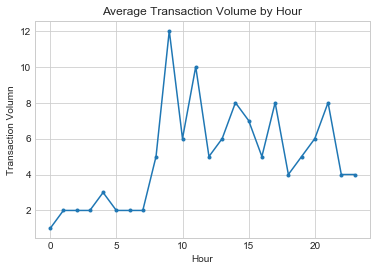

In [19]:
df_hour = df.pivot_table(values="transaction_id", index="hour", aggfunc =len)

import datetime
start = datetime.date(2018,8,1)
end = datetime.date(2018,10,31)
num_days = (end -start).days +1

df_hour["transaction_avg"] = df_hour["transaction_id"]//num_days

plt.xlabel('Hour')
plt.ylabel('Transaction Volumn')
plt.style.use('seaborn-whitegrid')
plt.plot(df_hour["transaction_avg"],marker='.')
plt.title("Average Transaction Volume by Hour")

# 1.5 challenge: exploring location information

In [20]:
df_distance = df_inAustralia.loc[df_inAustralia["merchant_long_lat"].notnull()]
import mpu
df_distance["dist"] = [mpu.haversine_distance((df_distance['clat'].iloc[x], df_distance["clong"].iloc[x]), (df_distance["mlat"].iloc[x], df_distance["mlong"].iloc[x])) for x in range(len(df_distance.merchant_long_lat))]
df = pd.concat([df,df_distance["dist"]], axis=1)
df.head()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,monthly,weekday,hour,account_customer,clong,clat,mlong,mlat,In_Australia,dist
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,153.38,-27.99,True,5.335071
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,151.21,-33.87,True,690.864475
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,8,2,1,ACC-1222300524_CUS-2142601169,151.23,-33.94,151.21,-33.87,True,7.999496
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,8,2,1,ACC-1037050564_CUS-1614226872,153.10,-27.66,153.05,-26.68,True,109.083222
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,153.44,-28.06,True,12.581042


Text(0.5, 1.0, 'Distance between Customer and Merchants')

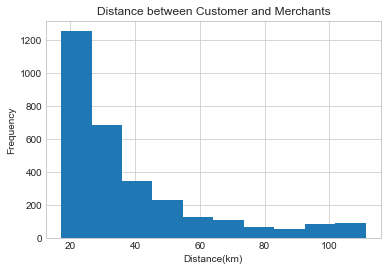

In [23]:
#pip install git+https://github.com/MartinThoma/mpu.git
df_distance.dist_adjusted = df_distance.dist[df_distance.dist.between(df_distance.dist.quantile(.3), df_distance.dist.quantile(.7))] 

plt.xlabel('Distance(km)')
plt.ylabel('Frequency')
plt.hist(df_distance.dist_adjusted)
plt.title("Distance between Customer and Merchants")

In [24]:
with open(os.path.join(path_prefix, 'googlemapapi.txt')) as f:
    api_key = f.readline()
    f.close

In [25]:
import gmaps
gmaps.configure(api_key=api_key)

In [26]:
customer_location = df_distance[['clat', 'clong']]
Australia_coordinates = (-25, 133)
fig = gmaps.figure(center=Australia_coordinates, zoom_level=4)
heatmap_layer = gmaps.heatmap_layer(customer_location)
heatmap_layer.gradient = [
    (200, 200, 200, 0.6),
    'red',
    'purple'
]
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
customer_location = df_distance[['clat', 'clong']]
merchant_location = df_distance[['mlat', 'mlong']]
Australia_coordinates = (-37.9, 144.9)
fig = gmaps.figure(center=Australia_coordinates, zoom_level=9)
customer_layer = gmaps.symbol_layer(
    customer_location, fill_color='rgba(0, 150, 0, 0.4)', stroke_color='rgba(0, 150, 0, 0.4)', scale=2
)
merchant_layer = gmaps.symbol_layer(
    merchant_location, fill_color='rgba(200, 0, 0, 0.4)', stroke_color='rgba(200, 0, 0, 0.4)', scale=2
)
fig.add_layer(customer_layer)
fig.add_layer(merchant_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
df.to_csv(os.path.join(path_prefix, 'Task1_0731/df_clean.csv'))